<a href="https://colab.research.google.com/github/eisbetterthanpi/vision/blob/main/selenium_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# @title setup
# https://colab.research.google.com/github/kaliiiiiiiiii/Selenium-Profiles/blob/master/google-colab/selenium_profiles.ipynb

%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium

# Install xvfb
apt install -y xvfb

# Install Selenium-Profiles
pip uninstall -y selenium_profiles
pip install --no-cache-dir selenium_profiles>=2.2.6

# pip install https://github.com/kaliiiiiiiiii/Selenium-Profiles/archive/refs/heads/dev.zip # dev-branch

# install python packages
pip install google-colab-shell
pip install webdriver-manager
pip install Pyvirtualdisplay


Executing: /tmp/apt-key-gpghome.YS4jFPchwD/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.iH0olyh48Q/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.L84RQVOahb/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [10]:
# @title service
# https://stackoverflow.com/questions/76428999/selenium-chrome-webdriver-stopped-working
# https://stackoverflow.com/questions/76409097/driver-webdriver-chrome-issues-with-a-selenium-approach-how-to-work-aro

!apt-get update
!apt-get install chromium chromium-driver
!pip3 install selenium

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

service = Service(executable_path="chromedriver")
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--blink-settings=imagesEnabled=false') # me
# options.add_experimental_option("prefs", {"profile.managed_default_content_settings.images": 2})
driver = webdriver.Chrome(service=service, options=options)

url = "https://www.google.com/search?q=Semi-Detached+House+bungalow+modern+-plan+-interior+-illustration+-news+-model+-3D"
driver.get(url)  # test fingerprint
# print(driver.title)
driver.quit()


Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease
Hit:4 http://deb.debian.org/debian-security buster/updates InRelease
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Hit:11 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:12 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:13 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:14 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Reading package lists... Done
Reading package

In [11]:
# @title scrape google
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
import requests
import math
from PIL import Image
import matplotlib.pyplot as plt

# Semi-Detached House bungalow modern -plan -interior -illustration -news -model -3D
# url="https://www.google.com/search?sxsrf=AB5stBjzK4Qjah_pvMXlxkPxv3P1VZb1nQ:1688463777227&q=Semi-Detached+House+bungalow+modern+-plan+-interior+-illustration+-news+-model+-3D&tbm=isch&sa=X&ved=2ahUKEwiWh6Hd4fT_AhUp1jgGHb3WCAkQ0pQJegQIChAB&biw=1286&bih=876&dpr=1"
# terrace modern design "properties" -youtube -plan -interior -illustration -news -model -3D
# url = "https://www.google.com/search?q=terrace+modern+design+%22properties%22+-youtube+-plan+-interior+-illustration+-news+-model+-3D&tbm=isch&safe=active&chips=q:terrace+modern+design+properties+-youtube+-plan+-interior+-illustration+-news+-model+-3d,online_chips:3bdrm+townhouse"
# terrace home modern design
# url = "https://www.google.com/search?sxsrf=AB5stBiZ6cUkUivPpaWz3iSX09llLBFmqg:1688459159623&q=terrace+home+modern+design&tbm=isch&sa=X&ved=&biw=1286&bih=876&dpr=1#imgrc=o-90EBgQu5d1eM"
# similar
url = "https://www.google.com/search?q=Semi-Detached%20House%20-youtube%20-plan%20-interior%20-illustration%20-news%20-model%20-3D%20&tbm=isch&safe=active&tbs=rimg:CQxEH_1bPaD3IYQ0GT2Q_163gtsgIRCgIIABAAOgQIARAAVdWgbT7AAgDYAgDgAgA&hl=en-US&sa=X&ved=0CBoQuIIBahgKEwiY55v8r4aAAxUAAAAAHQAAAAAQ0AI"

# driver.get(url)

# reject = driver.find_elements(By.XPATH,"*//button[@aria-label='Reject all']")#[0]#.click()
# if reject: reject[0].click()

# hits = driver.find_elements(By.XPATH,"*//a[@class='wXeWr islib nfEiy']")
# print(len(hits))
# # print(len(img_urls))


In [12]:
# @title funcs

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
def newdriver():
    service = Service(executable_path="chromedriver")
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--blink-settings=imagesEnabled=false') # me dont load images
    # options.add_argument("--disable-gpu") # me against SessionNotCreatedException: Timed out receiving message from renderer
    driver = webdriver.Chrome(service=service, options=options)
    return driver

# def newdriver():
#     time.sleep(1)
#     return "done"

import signal
import time
def timeout_handler(num, stack): raise Exception("timeout")

def new_driver():
    for i in range(30):
        signal.signal(signal.SIGALRM, timeout_handler)
        signal.alarm(2)
        try: return newdriver()
        except Exception as ex: pass
        finally: signal.alarm(0)

# print(new_driver())
# print(newdriver())


# driver = new_driver()
# driver.get(url)
# reject = driver.find_elements(By.XPATH,"*//button[@aria-label='Reject all']")#[0]#.click()
# if reject: reject[0].click()
# # # driver.quit()

def scroll_end(driver):
    end = driver.find_elements(By.XPATH,'''*//div[@data-endedmessage="Looks like you've reached the end"]''')[0]#.click()
    while end.get_attribute("data-status") != "3": # =5, =3 when reach end
        more = driver.find_elements(By.XPATH,"*//input[@value='Show more results']")[0]#.click()
        if more.is_displayed(): more.click()
        # height = driver.execute_script("return document.body.scrollHeight")
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") # scroll down


# start = time.time()
# scroll_end(driver)
# end = time.time()
# print(end-start) # 23.4sec 11.77s 14.43s
# start=end


# getting img url by clicking in, not reliable
#     # try: img_src = driver.find_elements(By.XPATH,"*//img[@jsname='kn3ccd']")[0].get_attribute("src")
#     # except: continue
#     # img_src = driver.find_elements(By.XPATH,"*//a[@class='Du2c7e']")[0].get_attribute("href")
#     # img_src = driver.find_elements(By.XPATH,"*//a[@class='Du2c7e']/img")[0].get_attribute("src")
def click_all(driver):
    see_more=[]
    hits = driver.find_elements(By.XPATH,"*//a[@class='wXeWr islib nfEiy']")
    driver.execute_script("hits = document.getElementsByClassName('wXeWr islib nfEiy')")
    print(len(hits)) # 780
    # for i, x in enumerate(hits):
    for i in range(len(hits)):
        # hits[i].click()
        driver.execute_script("hits["+str(i)+"].click();")
        try:
            WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, "*//a[@aria-label='See more Related content']")))
            see_mor = driver.find_elements(By.XPATH,"*//a[@aria-label='See more Related content']")[0].get_attribute("href")
        except: see_mor="_"
        see_more.append(see_mor)
    return see_more
# start = time.time()
# see_more = click_all(driver)
# end = time.time()
# print(end-start) # [i]:894.96sec , js:820sec=13m40s 801.75s 725.8 , no images 661=11m1s 741.8, 7, eager778., none 756 ,eager 846, eager no gpu801 870
# start=end

from urllib.parse import unquote
import re
def get_imgurls(driver):
    pro=driver.page_source
    # pro=driver.execute_script("return document.documentElement.outerHTML")
    pro = unquote(pro)
    pro = pro.encode().decode('unicode-escape') # try to remove \\u00
    # pattern = r"https://(?:(?!\").)*\.jpg" # start with https:// , no " , end with .jpg # https://stackoverflow.com/a/67540659/13359815
    pattern = r"(?<=href=\"/imgres\?imgurl=)(?:(?!&amp;).)*(?=&amp;)" # start with href="/imgres?imgurl= , no &amp; , end with &amp; # https://stackoverflow.com/a/3926546/13359815
    # pattern = r"https://(?:(?!\").)*(?=\")" # start with https:// , no " , end with " # all urls
    # pattern = r"(?<=\],\[\")https://(?:(?!\").)*(?=\")" # start with ],[" then https:// , no " , end with " # all imgs? fast
    m = re.findall(pattern, pro)
    return m

# start = time.time()
# m = get_imgurls(driver)
# end = time.time()
# print(end-start)
# start=end

import time
def get_skip(id=0, tt=20, dx=20):
    now = time.time()
    cyc = tt*dx
    curr = now %(cyc)
    want = id*dx
    skp = (want-curr)%cyc
    return skp



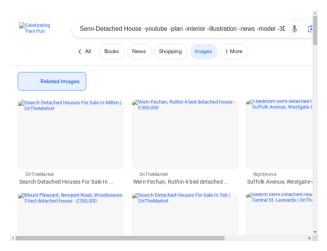

In [63]:
# @title check driver state
from PIL import Image
import matplotlib.pyplot as plt
driver.get_screenshot_as_file("canvas.png")
image = Image.open('canvas.png').convert("RGB")
plt.figure(figsize=(5, 3))
plt.axis('off')
plt.imshow(image)
plt.show()

# print(driver.page_source)


## wwwwwwwww

In [ ]:
# https://stackoverflow.com/a/69881106/13359815
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse

In [ ]:
!sudo apt-get install -qq w3m # to act as web browser
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

In [13]:
# @title setup pandas
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title save to pandas

df_explore = pd.read_excel("/content/drive/MyDrive/explore_url.xlsx", engine='openpyxl') # central img and seemor
df_home = pd.read_excel("/content/drive/MyDrive/home_urls.xlsx", engine='openpyxl') # finalgood img urls
df_scrape = pd.read_excel("/content/drive/MyDrive/toscrape.xlsx", engine='openpyxl') # search urls to scrape

#  = pandas.concat([objs, ])

# import time
# start = time.time()


# df_all.to_excel('/content/drive/MyDrive/properties_batch.xlsx', index=False, header=False)


# @title pandas row
import pandas as pd

# df = pd.DataFrame()
data = {'url':[], 'sm':[]}
df = pd.DataFrame(data)
# display(df)


for i, url in enumerate(m):
# for i, url in enumerate(m[:5]):
    if url in df['url'].values:
        # print(url, see_more[i])
        continue
    df.at[i, 'url'] = url
    df.at[i, 'sm'] = see_more[i]

# https://imgmy.waa2.com/home/160123/bungalow-for-sale-9a689ec9bd1db5caaea6d0343196e998_thumb.jpg

# print(df['url'].values)
display(df)



In [ ]:
# @title remove duplicates
df = pd.read_excel("/content/drive/MyDrive/explore_url.xlsx", engine='openpyxl')
df = df.drop_duplicates(subset="img_url")
rows = df['img_url'].count()
print(rows)
df.to_excel('/content/drive/MyDrive/explore_url_d.xlsx', index=None)
# https://media.daft.ie/eyJidWNrZXQiOiJtZWRpYW1hc3Rlci1zM2V1IiwiZWRpdHMiOnsicmVzaXplIjp7ImZpdCI6ImNvdmVyIiwid2lkdGgiOjE0NDAsImhlaWdodCI6OTYwfX0sIm91dHB1dEZvcm1hdCI6ImpwZWciLCJrZXkiOiI2LzUvNjUzZTY0YTc0NTRhNzQ1N2ZmZWE0OGM3N2QwYWEyODQuanBnIn0=?signature=48bb875ff21beb34743ba4f09e5bc6979a041031ab0d77a83545c550cb776fb2


10599


In [ ]:
# @title toscrape urls

# Semi-Detached House bungalow modern -plan -interior -illustration -news -model -3D
# Semi-Detached House bungalow modern -plan -interior -illustration -news -model -3D
# terrace modern design "properties" -youtube -plan -interior -illustration -news -model -3D
# terrace home modern design

# Semi-Detached House bungalow modern
# Semi-Detached House modern
# bungalow modern
# Detached House modern
# terrace modern design "properties"


a1=['Semi-Detached House', 'Detached House', 'terrace House', 'bungalow']
a2=['modern ', '']
a3=['''"properties" ''', '']

import itertools
a = itertools.product(a1, a2, a3)
for x in a:
    # print(x)
    # print(' '.join(x))
    search = ' '.join(x).replace('  ',' ')
    # search='''\
    # terrace modern design "properties"\
    # '''
    # print(search)
    exclude = "-youtube -plan -interior -illustration -news -model -3D"
    query = (search+exclude).replace(' ','+')
    # print(query)
    url = "https://www.google.com/search?as_st=y&tbm=isch&as_q="+query+"&as_epq=&as_oq=&as_eq=&cr=&as_sitesearch=&safe=active&tbs=isz:lt,islt:qsvga,itp:photo,ic:color,iar:w"
    print(url)


In [ ]:
# @title wwwwwwwww

# def to_save(df, id=id, tt=tt, dx=dx):
def to_save(df, id=0, tt=5, dx=30):
    # skip = get_skip(id=id, tt=tt, dx=dx)
    # print(id, "skip", skip)
    # time.sleep(skip)
    # display()
    print(id,'done')
    with pd.ExcelWriter('/content/drive/MyDrive/explore_url.xlsx', mode='a', engine="openpyxl", if_sheet_exists="overlay") as writer:
        startrow = len(list(list(writer.sheets.values())[0].rows))
        df.to_excel(writer, header=None, index=None, startrow=startrow)

def get_search(sid=0, stt=5, sdx=30):
    skip = get_skip(id=sid, tt=stt, dx=sdx)
    time.sleep(skip)
    df_scrape = pd.read_excel("/content/drive/MyDrive/toscrape.xlsx", engine='openpyxl') # search urls to scrape
    # tt_search = df_scrape['search_url'].count()
    done_idx = df_scrape['done'].count()
    print(done_idx)
    df_scrape.loc[done_idx, 'done'] = 1
    df_scrape.to_excel('/content/drive/MyDrive/toscrape.xlsx', index=False)
    searchurls = df_scrape.loc[done_idx, 'search_url']#.tolist()
    return searchurls


def pon(skip): # time is right
    global q
    if q: return
    q=True
    skip = get_skip(id=0, tt=1, dx=3)
    time.sleep(skip)
    global mlist, slist
    data = {'url':mlist, 'sm':slist}
    df = pd.DataFrame(data)
    to_save(df, id=id)
    mlist, slist = [], []
    q=False


import pandas as pd
# df_scrape = pd.read_excel("/content/drive/MyDrive/toscrape.xlsx", engine='openpyxl') # search urls to scrape
# tt_search = df_scrape['search_url'].count()
# done_idx = df_scrape['done'].count()

from concurrent.futures import ThreadPoolExecutor

driver = newdriver()
e = ThreadPoolExecutor(30)
future = e.submit(get_search, id)

id=1 # M0 B1 S2 A3 t4

q=False
mlist, slist = [], []
# while done_idx<tt_search:
while True:
    url = future.result()
    future = e.submit(get_search, id)
    # url = get_search(sid=id)
    print(url)

    try: driver.get(url)
    except Exception as e:
        print(url, e)
    reject = driver.find_elements(By.XPATH,"*//button[@aria-label='Reject all']")#[0]#.click()
    if reject: reject[0].click()
    scroll_end(driver)
    see_more = click_all(driver)
    m = get_imgurls(driver)
    print(id, len(m), len(see_more), url)

    mlist.extend(m)
    slist.extend(see_more)
    future = e.submit(pon, skip)

    # df_scrape = pd.read_excel("/content/drive/MyDrive/toscrape.xlsx", engine='openpyxl') # search urls to scrape
    # tt_search = df_scrape['search_url'].count()
    # done_idx = df_scrape['done'].count()


# if a['Names'].str.contains('Mel').any():
# mel_exists = (df['names'] == 'Mel').any()
# mel_exists2 = 'Mel' in df['names'].values




925
https://www.google.com/search?q=Semi-Detached%20House%20%22properties%22%20-youtube%20-plan%20-interior%20-illustration%20-news%20-model%20-3D%20&tbm=isch&safe=active&tbs=rimg:CbY-wyPRHPzXYQWCdmV0WGOFsgIRCgIIABAAOgQIARAAVQ8YdD7AAgDYAgDgAgA&hl=en-US&sa=X&ved=0CBoQuIIBahgKEwj4vp78r4aAAxUAAAAAHQAAAAAQtCw
100
926


In [ ]:

import pandas as pd
data = {'url':[7,4,7,657,63,864,5,435,6], 'sm':[1,1,0,1,0,0,0,0,0]}
df1 = pd.DataFrame(data)
dft = df1.loc[df1['sm'] != 1]
# display(dft)
print(dft.index)



Int64Index([2, 4, 5, 6, 7, 8], dtype='int64')


In [ ]:
df_scrape = pd.read_excel("/content/drive/MyDrive/toscrape.xlsx", engine='openpyxl') # search urls to scrape
tt_search = df_scrape['search_url'].count()
done_idx = df_scrape['done'].count()
print(done_idx)


16


In [ ]:
# @title xlxs operation
df_scrape = pd.read_excel("/content/drive/MyDrive/toscrape.xlsx", engine='openpyxl') # search urls to scrape
# print(df_scrape.columns)
# df_scrape.loc[:, 'done'] = None
# df_scrape.drop(columns=[2], inplace=True)
# df_scrape.drop(columns=2, inplace=True)
# df_scrape.drop([2],axis=1)
display(df_scrape)
df_scrape.to_excel('/content/drive/MyDrive/toscrape.xlsx', index=False)


## from clean

In [ ]:
!pip install Pillow --upgrade


In [ ]:
# @title setup / model
# https://colab.research.google.com/github/openai/clip/blob/master/notebooks/Interacting_with_CLIP.ipynb
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

import numpy as np
import torch
# from pkg_resources import packaging
# print("Torch version:", torch.__version__)
import clip
# clip.available_models()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model, preprocess = clip.load("ViT-B/32") # preprocess: normalize intensity using dataset mean and sd then resize and center-crop to conform to the model expects.
# model.cuda().eval()
model.to(device).eval()
input_resolution = model.visual.input_resolution # 224
context_length = model.context_length # 77
vocab_size = model.vocab_size # 49408
# print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}") # 151,277,313
# clip.tokenize("Hello World!") # case-insensitive tokenizer, padded to become 77 tokens


In [ ]:
# @title test texts
images=[]
og_img=[]

# [76,]

c=270
for i in range(c,c+15):
    # response = requests.get(m[i], stream=True)
    # try: response = requests.get(m[i], stream=True)
    try: response = requests.get(ulst[i], stream=True)
    except: continue
    # img = Image.open(response.raw)
    try: img = Image.open(response.raw)
    except: continue
    images.append(preprocess(img))
    og_img.append(img)

# texts=['an image of the exterior facade of a modern house','an image of the exterior facade of a house','the interior of a house','an image with text words','a collage']
# texts=['a modern design house architecture','an image of the front exterior facade of a house','the interior of a house','a thumbnail containing english text/ words','a leaflet/ advertisement containing english text/ words','a collage']
# texts=['a modern design house architecture','a photograph of the front exterior of a house','the interior of a house','a thumbnail containing english text/ words','a leaflet/ advertisement containing english text/ words','a collage', 'a wall']
# texts=['a modern design house architecture','a photograph of the front exterior of a house','the interior of a house','a thumbnail containing english text/ words OR a leaflet/ advertisement containing english text/ words','a collage', 'a wall']
texts=['a modern design house architecture','a photograph of the front exterior of a house','the interior of a house indoors furniture','a thumbnail/ leaflet/ advertisement containing english text/ words/ text overlay','a collage of multiple images', 'a wall']

# housing facade, house front

# interior of a
# facade of a modern house
# text/ words


# normalize images, tokenize text input, forward pass model to get image text features
image_input = torch.tensor(np.stack(images)).to(device)
text_tokens = clip.tokenize(["This is " + desc for desc in texts]).to(device)
# text_tokens = clip.tokenize(texts).to(device)

with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    text_features = model.encode_text(text_tokens).float()

# Calculating cosine similarity: normalize features and calculate dot product of each pair.
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T
# print(similarity)

count = len(texts)

import matplotlib.pyplot as plt
# plt.figure(figsize=(20, 14))
plt.figure(figsize=(30, 14))
plt.imshow(similarity, vmin=0.1, vmax=0.3)
# plt.colorbar()
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])
for i, image in enumerate(og_img):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
    plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, len(og_img) - 0.5])
# plt.ylim([count + 0.5, -2])
plt.ylim([count - 0.5, -1.5]) # bottom, top margin
plt.show()
# plt.title("Cosine similarity between text and image features", size=20)


In [ ]:
# @title base get similarity

images=[]
og_img=[]

c=110
for i in range(c,c+10):
    img,label=data[i]
    images.append(preprocess(img))
    og_img.append(img)

texts=['a modern design house architecture','an image of the front exterior facade of a house','the interior of a house','a thumbnail containing english text/ words','a leaflet/ advertisement containing english text/ words','a collage']


# normalize images, tokenize text input, forward pass model to get image text features
image_input = torch.tensor(np.stack(images)).to(device)
text_tokens = clip.tokenize(["This is " + desc for desc in texts]).to(device)


with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    text_features = model.encode_text(text_tokens).float()

# Calculating cosine similarity: normalize features and calculate dot product of each pair.
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
# similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

similarity = text_features @ image_features.T
print(similarity)

# blur 0.23



In [ ]:
# uuu=m[1]
uuu="https://jcpropertiesmalta.com/wp-content/uploads/2022/09/m1e-1740x960-c-center.jpg"
print(uuu)
response = requests.get(uuu, stream=True)
image = Image.open(response.raw)
plt.imshow(image)


In [ ]:
# @title collect
# use clip to get similarity scores for all images
import os
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

# texts=['a modern design house architecture','an image of the front exterior facade of a house','the interior of a house','a thumbnail containing english text/ words','a leaflet/ advertisement containing english text/ words','a collage']
texts=['a modern design house architecture','a photograph of the front exterior of a house','the interior of a house indoors furniture','a thumbnail/ leaflet/ advertisement containing english text/ words/ text overlay','a collage of multiple images', 'a wall']

text_tokens = clip.tokenize(["This is " + desc for desc in texts]).to(device)
with torch.no_grad(): text_features = model.encode_text(text_tokens).float()
text_features /= text_features.norm(dim=-1, keepdim=True)

import io
import requests
def get_img(uuu):
    for _ in range(3):
        try:
            response = requests.get(uuu, stream=True)
            image = Image.open(response.raw).convert('RGB')
            image = preprocess(image)
            return uuu, image
        except Exception as e:
            print(e)
            continue
    print("fail", uuu)
    return

batch_size = 1024 # 16
see_more
from concurrent.futures import ThreadPoolExecutor
import time
uall = []
sall = torch.empty(0, device=device)
# for i, uuu in enumerate(m[:5]):
# for i, uuu in enumerate(m):
for i in range(0, len(m), batch_size):
    # i=0
    print(i)
    start = time.time()
    # e = ThreadPoolExecutor(batch_size) # 19.788sec
    e = ThreadPoolExecutor(min(batch_size, len(m))) # 21sec

    # result = e.map(get_img, m[i*batch_size: min((i+1)*batch_size, len(m))])
    # # result = e.map(get_img, m)
    # result = list(filter(lambda item: item is not None, result))

    # future = [e.submit(get_img, uuu) for uuu in m[i*batch_size: min((i+1)*batch_size, len(m))]]
    future = [e.submit(get_img, uuu) for uuu in m[i: min(i+batch_size, len(m))]]
    # result = [f.result() for f in future if f.result() is not None]
    ulst = [f.result()[0] for f in future if f.result() is not None]
    images = [f.result()[1] for f in future if f.result() is not None]
    # imgidx = [i for i in range(len(future)) if future[i].result() is not None] # only use for indexing m
    # print(len(ulst))


    end = time.time()
    print(end-start)
    start=end


    images = torch.tensor(np.stack(images)).to(device)
    # print(images.shape)
    # img= preprocess(images).to(device).unsqueeze(0)
    with torch.no_grad():
        image_features = model.encode_image(images).float()
    image_features /= image_features.norm(dim=-1, keepdim=True)
    similarity = text_features @ image_features.T
    # print(similarity.squeeze())

    uall.extend(ulst)
    sall = torch.cat((sall, similarity.squeeze().T))

    # great, good interior, word, collage, left = filter(sall)
    # df_scrape.loc[done_idx:min(done_idx+5-1, tt_search), 'done'] = 1


print(sall)
# 19.6s, 25.88s



In [ ]:
# @title filter
import torchvision
from torchvision import transforms

def clip_filter(sall)
    great, good, interior, word, collage, wall, left = [],[],[],[],[],[],[]
    great_s, good_s, interior_s, word_s, collage_s, wall_s, left_s = [],[],[],[],[],[],[]
    # ['a modern design house architecture','an image of the front exterior facade of a house','the interior of a house','a thumbnail containing english text/ words','a leaflet/ advertisement containing english text/ words','a collage']
    length = len(sall[0])
    for idx, similarity in enumerate(sall):
        modern = similarity[0]
        house = similarity[1]
        inter = similarity[2]
        text = similarity[3]
        colge = similarity[4]
        wal = similarity[5]

        if inter>=0.26: # 0.27
            interior.append(idx)
            interior_s.append(similarity)
        elif text>=0.20:
            word.append(idx)
            word_s.append(similarity)
        elif colge>=0.21:
            collage.append(idx)
            collage_s.append(similarity)
        elif wal>=0.21:
            wall.append(idx)
            wall_s.append(similarity)

        # elif house<0.23 or (length-2)*house-similarity[2:].sum()<0.01 or house-iter<0.01 or house-text<0.01 or house-ad<0.01 or house-colge<0.01:
        elif house<0.23 or (length-2)*house-similarity[2:].sum()<0.01:# or house-iter<0.01 or house-text<0.01 or house-ad<0.01 or house-colge<0.01:
            left.append(idx)
            # print((length-2)*house-similarity[2:].sum())
            left_s.append((length-2)*house-similarity[2:].sum())
            # left_s.append(similarity)
        elif modern>=0.27: # great
            great.append(idx)
            great_s.append(similarity)
        else: # good
            good.append(idx)
            good_s.append(similarity)
        # print(similarity[1:].sum()-similarity[0])
    return great, good, interior, word, collage, wall, left
    # return great_s, good_s, interior_s, word_s, collage_s, wall_s, left_s
great, good, interior, word, collage, wall, left = clip_filter(sall)

print("sall",len(sall))
print("great",len(great))
print("good",len(good))
print("interior",len(interior))
print("word",len(word))
print("collage",len(collage))
print("wall",len(wall))
print("left",len(left))



sall 1917
great 45
good 1179
interior 17
word 378
collage 0
wall 37
left 261


In [ ]:
# print(len(ulst))
# print(len(uall))
# print(len(uall[0]))
# print(len(uall[1]))
# # uall[0].extend(uall[1])
# # print(len())
# uall=uall[0]

975
2
1917
975


In [ ]:


def save_final(good_list, id=0, tt=20, dx=5):
    data = {'img_url':good_list}
    df = pd.DataFrame(data)
    skip = get_skip(id=id, tt=tt, dx=dx)
    # print(id, "skip", skip)
    time.sleep(skip)
    # df_home = pd.read_excel("/content/drive/MyDrive/home_urls.xlsx", engine='openpyxl') # good img urls
    with pd.ExcelWriter('/content/drive/MyDrive/home_urls.xlsx', mode='a', engine="openpyxl", if_sheet_exists="overlay") as writer:
        # df.to_excel(writer, header=None, index=None, startrow=len(df.index))
        startrow = len(list(list(writer.sheets.values())[0].rows))
        df.to_excel(writer, header=None, index=None, startrow=startrow)




In [ ]:
# @title display imgs
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi'] = 300

def imshow(img):
    # img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

import torchvision.transforms as transforms
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(),])
def ind_img(idx):
    for t in range(3):
        try:
            # response = requests.get(m[idx], stream=True) # for checking only
            response = requests.get(uall[idx], stream=True)
            image = Image.open(response.raw).convert('RGB')
            image = transform(image)
            # print(idx, uall[idx])
            return image
        except Exception as e:
            print(e, idx)
            continue
    print(idx, m[idx])
    # print(idx, uall[idx])
    return


from concurrent.futures import ThreadPoolExecutor
def ind2img(indlst):
    e = ThreadPoolExecutor(len(indlst))
    # result = e.map(ind_img, indlst) # 8/2.7sec 7/2.5
    # result = list(filter(lambda item: item is not None, result))

    future = [e.submit(ind_img, ind) for ind in indlst] # 5/2.2sec 7/2.4
    result = [f.result() for f in future if f.result() is not None]
    # print(None in result)
    # [print(x.shape) for x in result]
    # print(np.stack(result).shape)
    images = torch.tensor(np.stack(result))#.to(device)
    return images


c=0
start = time.time()
import torchvision
# imshow(torchvision.utils.make_grid(ind2img(great)))
# imshow(torchvision.utils.make_grid(ind2img(great[c:c+64])))
# imshow(torchvision.utils.make_grid(ind2img(good[c:c+64])))
# imshow(torchvision.utils.make_grid(ind2img(interior)))
# imshow(torchvision.utils.make_grid(ind2img(word[c:c+64])))
# # imshow(torchvision.utils.make_grid(ind2img(word)))
# imshow(torchvision.utils.make_grid(ind2img(left[c:c+64])))
# imshow(torchvision.utils.make_grid(ind2img(collage)))
imshow(torchvision.utils.make_grid(ind2img(wall)))
# imshow(torchvision.utils.make_grid(ind2img(list(range(len(uall))))))
# imshow(torchvision.utils.make_grid(ind2img(list(range(c*64,(c+1)*64)))))


# for c in range(11):
#     print(c)
#     imshow(torchvision.utils.make_grid(ind2img(list(range(c*64,(c+1)*64)))))




end = time.time()
print(end-start)
start=end




In [ ]:
# print(great[:64])
# print(good[6])
print(wall[33]) # 18,19,33
print(wall_s[33])

# print(wall[19]) # 1397 ,1420, 1847
# print(uall[1397])
# print(uall[1420])
# print(uall[1847])
# response = requests.get(uall[18], stream=True)
# image = Image.open(response.raw)
# image = transform(image)
# print(image.shape)
# plt.imshow(image)
# print(image)


1847
https://images.ratemyagent.com/ratemyagent/image/upload/q_auto:eco,f_auto,w_530,h_400,c_fill,g_center,fl_progressive/cdn/753fa6e3-1901-ee11-abbf-02ef25cab6bc


In [ ]:


data = {'img_url':[uall[i] for i in good]}
df = pd.DataFrame(data)
display(df)
# skip = get_skip(id=id, tt=tt, dx=dx)
# # print(id, "skip", skip)
# time.sleep(skip)
# # df_home = pd.read_excel("/content/drive/MyDrive/home_urls.xlsx", engine='openpyxl') # good img urls
with pd.ExcelWriter('/content/drive/MyDrive/home_urls.xlsx', mode='a', engine="openpyxl", if_sheet_exists="overlay") as writer:
    # df.to_excel(writer, header=None, index=None, startrow=len(df.index))
    startrow = len(list(list(writer.sheets.values())[0].rows))
    df.to_excel(writer, header=None, index=None, startrow=startrow)




In [ ]:
# print(len(future))
# print(len(m))
# print(len(imgidx))
# print(imgidx)
# print(see_more)
# for i,x in enumerate(see_more):
#     print(i,x)


print(len(m)) # 776
print(len(list(set(m)))) # 688
print(len(see_more)) # 788
print(len(list(set(see_more)))) # 780

# dm=list(set(m))
# ds=list(set(see_more))

# for i in range(600,605):
#     print(i,dm[i])
#     print(ds[i])


776
688
788
780


In [ ]:
def file2img(img_files):
    imgs=[]
    for img_file in img_files:
        image = Image.open(img_file).convert("RGB")
        image=transforms.ToTensor()(image)
        imgs.append(image)
    return imgs


# imshow(torchvision.utils.make_grid(file2img(good[c:c+64])))

imshow(torchvision.utils.make_grid(great[c:c+64]))
# imshow(torchvision.utils.make_grid(file2img(great[c:c+64])))
# imshow(torchvision.utils.make_grid(file2img(good[c:c+64])))
# imshow(torchvision.utils.make_grid(file2img(interior)))
# imshow(torchvision.utils.make_grid(file2img(word[c:c+64])))
# # imshow(torchvision.utils.make_grid(file2img(left[c:c+100]),nrow=10))
# imshow(torchvision.utils.make_grid(file2img(left[c:c+64])))


print(obscured[c:c+64])


['/content/gsv70k/01/01. 20 BUTTERFLY AVE 2022-03.jpg', '/content/gsv70k/01/01. 9 JLN LABU AYER 2019-05.jpg', '/content/gsv70k/01/01. 7 LUCKY CRES 2022-09.jpg', '/content/gsv70k/01/01. 1A GUILLEMARD RD 2022-04.jpg', '/content/gsv70k/01/01. 102 JLN KURAS 2019-08.jpg', '/content/gsv70k/01/01. 38 PEACH GDN 2022-10.jpg', '/content/gsv70k/01/01. 30 JLN ASAS 2022-11.jpg', '/content/gsv70k/01/01. 17 ELITE TER 2022-09.jpg', '/content/gsv70k/01/01. 8 HAIG AVE 2022-05.jpg', '/content/gsv70k/01/01. 22 LIMAU GDN 2022-09.jpg', '/content/gsv70k/01/01. 92A GUILLEMARD RD 2022-09.jpg', '/content/gsv70k/01/01. 94 BRANKSOME RD 2022-03.jpg', '/content/gsv70k/01/01. 4 FIDELIO ST 2023-01.jpg', '/content/gsv70k/01/01. 132 MARSHALL RD 2022-10.jpg', '/content/gsv70k/01/01. 54 LICHI AVE 2018-03.jpg', '/content/gsv70k/01/01. 17 NAROOMA RD 2022-09.jpg', '/content/gsv70k/01/01. 22A BRIGHTON AVE 2019-04.jpg', '/content/gsv70k/01/01. 24 ROBERTS LN 2022-10.jpg', '/content/gsv70k/01/01. 442 MACPHERSON RD 2022-03.jpg',

In [ ]:
for i,x in enumerate(left_s):
    print(i, x.item())

In [ ]:
# @title house main




# for img_file, blurrness in zip(img_file_list, blurrness_list):
# for x,filename in enumerate(left):
# for x,(location, filename) in enumerate(zip(location_list, filename_list)):
for x,(location, filename) in enumerate(zip(location_list[start:], filename_list[start:])):
# for x,(olat, olng, filename) in enumerate(zip(latitude_list[start:], longitude_list[start:], filename_list[start:])):
    # if x in [34,40,62]:
    #     continue
    print(x)

    try:
        i = df_all.index[df_all['Filename'] == filename][0]
    except: i = df_all.index[df_all['Filename'] == filename.replace('-','/').replace('_','/')][0]
    # print(i)
    # df_all.at[i, 'glat'] = olat
    # df_all.at[i, 'glng'] = olng
    df_all.at[i, 'gdate'] = date
    df_all.at[i, 'name'] = filename
    # print(loc)

    cls=filename.split('. ')[0]
    filename=filename.replace("/", "-")

    pic_dir = file_dir+'/'+cls+'/'+filename + ' ' + date + '.jpg'

    with open(pic_dir, 'wb') as pic_file:
        pic_file.write(pic_content)
    # image = Image.open(pic_dir).convert("RGB")
    # plt.figure(figsize=(5, 4))
    # plt.axis('off')
    # plt.imshow(image)
    # plt.show()

    # t+=1
    # if t >=5: break

df_all.to_excel('/content/drive/MyDrive/properties_batch.xlsx', index=False, header=False)

# No Street View imagery available here


In [ ]:
# import os
# os.mkdir("/content/ggmap_frombad")
# for x in range(1,7):
#     os.mkdir("/content/ggmap_frombad/0"+str(x))


In [ ]:
# @title trash

# def vfilter(sall):
#     length=6
#     aidx = torch.arange(len(sall))
#     # torch.where(sall[2]>=0.26,aidx)
#     # interior = aidx[a[:, 0] - a[:, 1] > 300]
#     # interior = aidx[a[:, 2] >= 0.26]
#     intf = torch.tensor([sall[:, 2] >= 0.26])
#     print(intf.shape, intf)
#     interior, sall = aidx[intf], sall[~intf,:]
#     texf = torch.tensor([aidx[:, 3] >= 0.20])
#     word, aidx = aidx[texf], aidx[~texf]
#     colf = torch.tensor([aidx[:, 4] >= 0.21])
#     collage, aidx = aidx[colf], aidx[~colf]
#     walf = torch.tensor([aidx[:, 5] >= 0.21])
#     wall, aidx = aidx[walf], aidx[~walf]
#     houf = torch.tensor([aidx[:, 1] >= 0.23 | (length-2)*aidx[:, 1] - aidx[:,2:].sum() < 0.01])
#     left, aidx = aidx[houf], aidx[~houf]
#     modf = torch.tensor([aidx[:, 0] >= 0.27])
#     great, good = aidx[modf], aidx[~modf]
#     return great, good, interior, word, collage, wall, left

# # print(sall.shape)
# great, good, interior, word, collage, wall, left = vfilter(sall)


